In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications. vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import zipfile
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
#!pip install opencv-python

In [4]:
import pathlib
# Directory with Jeans pictures
jeans_dir = os.path.join('DT\Train\Jeans_Images')

# Directory with Saree pictures
saree_dir = os.path.join('DT\Train\Sarees_Images')

# Directory with Trouser pictures
trousers_dir = os.path.join('DT\Train\Trouser_Images')

In [5]:
train_jeans_names = os.listdir(jeans_dir)
print(train_jeans_names[:5])

train_saree_names = os.listdir(saree_dir)
print(train_saree_names[:5])

train_trousers_names = os.listdir(trousers_dir)
print(train_trousers_names[:5])

['img1.jpeg', 'img10.jpeg', 'img100.jpeg', 'img101.jpeg', 'img102.jpeg']
['img1.jpeg', 'img10.jpeg', 'img100.jpeg', 'img101.jpeg', 'img102.jpeg']
['img1.jpeg', 'img10.jpeg', 'img100.jpeg', 'img101.jpeg', 'img102.jpeg']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
print("Count of Training Images")
print("No.of Images of Sarees in train dataset :",len(os.listdir('DT\Train\Sarees_Images')))
print("No.of Images of Jeans in train dataset :",len(os.listdir('DT\Train\Jeans_Images')))
print("No.of Images of Trousers in train dataset :",len(os.listdir('DT\Train\Trouser_Images')))
print()
print("Count of Test Images")
print("No.of Images of Sarees in test dataset :",len(os.listdir('DT\Test\Sarees_Images')))
print("No.of Images of Jeans in test dataset :",len(os.listdir('DT\Test\Jeans_Images')))
print("No.of Images of Trousers in test dataset :",len(os.listdir('DT\Test\Trouser_Images')))

Count of Training Images
No.of Images of Sarees in train dataset : 220
No.of Images of Jeans in train dataset : 200
No.of Images of Trousers in train dataset : 200

Count of Test Images
No.of Images of Sarees in test dataset : 35
No.of Images of Jeans in test dataset : 35
No.of Images of Trousers in test dataset : 35


In [8]:
train_data='DT\Train'
test_data='DT\Test'

In [9]:
input_shape=(240,240,3)
batch_size=12

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
Train_datagen=ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [12]:
Training_set=Train_datagen.flow_from_directory(train_data,
                                                              target_size=(240,240),
                                                              batch_size=32, 
                                                              class_mode='categorical')

Found 620 images belonging to 3 classes.


In [13]:
Test_datagen=ImageDataGenerator(rescale=1./255)
Test_set=Test_datagen.flow_from_directory(test_data,
                                                  target_size=(240,240),
                                                  batch_size=5, 
                                                  class_mode='categorical')

Found 105 images belonging to 3 classes.


In [14]:
import tensorflow as tf

In [15]:
IMAGE_SIZE = [240,240]


# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [16]:
# useful for getting number of classes
folders = glob('DT\Train\*')

In [17]:
# our layers - you can add more if you want
#x = Flatten()(vgg.output)
#x = Dense(1000, activation='relu')(x)
#prediction = Dense(len(folders),activation='softmax')(x)

# create a model object
#model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
#model.summary()

# tell the model what cost and optimization method to use
#model.compile(
#  loss='categorical_crossentropy',
#  optimizer='adam',
#  metrics=['accuracy']
#)

In [18]:
import tensorflow as tf

In [19]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 240 * 240 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(240,240, 3)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(240,240, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 512 neuron in the fully-connected layer
    tf.keras.layers.Dense(512, activation='relu'),
    # 3 output neurons for 3 classes with the softmax activation
    tf.keras.layers.Dense(3, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 236, 236, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 118, 118, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 116, 116, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 114, 114, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 57, 57, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 55, 55, 256)       2

In [21]:
folders

['DT\\Train\\Jeans_Images',
 'DT\\Train\\Sarees_Images',
 'DT\\Train\\Trouser_Images']

In [22]:
# fit the model
#r = model.fit_generator( Training_set,validation_data=Test_set,epochs=10)

In [23]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

C:\Users\ashis\.conda\envs\tf2\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [24]:
total_sample = Training_set.n
n_epochs = 100

In [25]:
batch_size = 31

In [26]:
model.fit(
        Training_set, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)

Epoch 1/100
20/20 [==============================] - 332s 17s/step - loss: 73.3465 - acc: 0.3371
Epoch 2/100
20/20 [==============================] - 332s 17s/step - loss: 1.1115 - acc: 0.3532
Epoch 3/100
20/20 [==============================] - 332s 17s/step - loss: 1.3360 - acc: 0.3419
Epoch 4/100
20/20 [==============================] - 331s 16s/step - loss: 1.1331 - acc: 0.3548
Epoch 5/100
20/20 [==============================] - 332s 17s/step - loss: 1.0985 - acc: 0.3548
Epoch 6/100
20/20 [==============================] - 331s 17s/step - loss: 1.0982 - acc: 0.3548
Epoch 7/100
20/20 [==============================] - 333s 17s/step - loss: 1.6736 - acc: 0.3823
Epoch 8/100
20/20 [==============================] - 331s 16s/step - loss: 1.0986 - acc: 0.3565
Epoch 9/100
20/20 [==============================] - 331s 17s/step - loss: 1.0983 - acc: 0.3548
Epoch 10/100
20/20 [==============================] - 332s 17s/step - loss: 1.0983 - acc: 0.3548
Epoch 11/100
20/20 [==================

In [27]:
from PIL import Image

In [28]:
#Taking 5 images to predict first
test_jeans = os.listdir('DT\Test\Jeans_Images/')[:5]
print(test_jeans)
test_sarees = os.listdir('DT\Test\Sarees_Images/')[:5]
print(test_sarees)
test_trousers = os.listdir('DT\Test\Trouser_Images/')[:5]
print(test_trousers)

['img201.jpeg', 'img202.jpeg', 'img203.jpeg', 'img204.jpeg', 'img205.jpeg']
['img221.jpeg', 'img222.jpeg', 'img223.jpeg', 'img224.jpeg', 'img225.jpeg']
['img201.jpeg', 'img202.jpeg', 'img203.jpeg', 'img204.jpeg', 'img205.jpeg']


In [29]:
Categories = ["Jeans", "Sarees", "Trousers"]

In [30]:
set(Test_set.classes)  # Unique Values of the Classes to be predicted

{0, 1, 2}

# Prediction of Test dataset

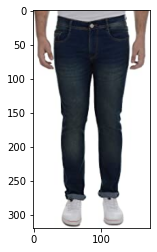

Predicted as:  Jeans



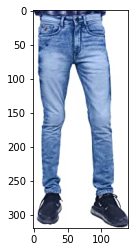

Predicted as:  Jeans



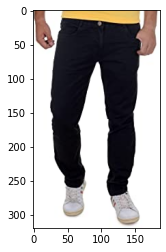

Predicted as:  Jeans



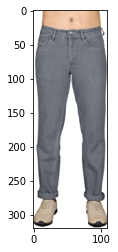

Predicted as:  Jeans



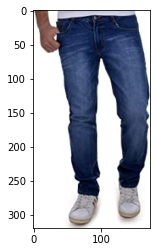

Predicted as:  Jeans



In [31]:
path = 'DT\Test\Jeans_Images/'
for img_name in test_jeans:
    img_test=Image.open(path + img_name)
    plt.imshow(img_test)
    plt.show()  # Plotting the input Test Image
    img_test = img_test.resize((240,240))    
    img_test=np.expand_dims(img_test,axis=0) # Expand dimensions for proper prediction
    print("Predicted as: ",Categories[int(np.argmax(model.predict(img_test)))])  # Predicting Classes using the Model
    print()

In [32]:
model.predict(img_test)

array([[1., 0., 0.]], dtype=float32)

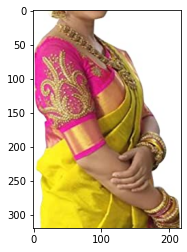

Predicted as:  Sarees



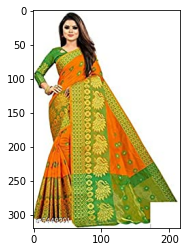

Predicted as:  Sarees



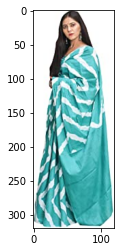

Predicted as:  Sarees



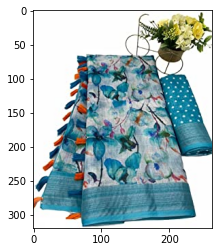

Predicted as:  Sarees



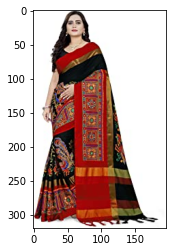

Predicted as:  Sarees



In [33]:
path = 'DT\Test\Sarees_Images/'
for img_name in test_sarees:
    img_test=Image.open(path + img_name)
    plt.imshow(img_test)
    plt.show()  # Plotting the input Test Image
    img_test = img_test.resize((240,240))    
    img_test=np.expand_dims(img_test,axis=0) # Expand dimensions for proper prediction
    print("Predicted as: ",Categories[int(np.argmax(model.predict(img_test)))])  # Predicting Classes using the Model
    print()

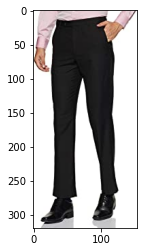

Predicted as:  Jeans



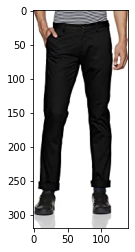

Predicted as:  Jeans



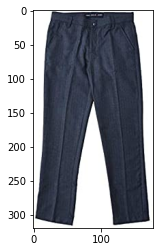

Predicted as:  Jeans



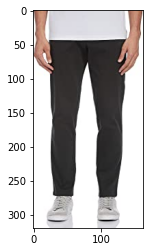

Predicted as:  Jeans



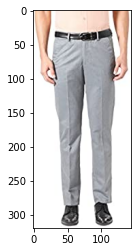

Predicted as:  Jeans



In [34]:
path = 'DT\Test\Trouser_Images/'
for img_name in test_trousers:
    img_test=Image.open(path + img_name)
    plt.imshow(img_test)
    plt.show()  # Plotting the input Test Image
    img_test = img_test.resize((240,240))    
    img_test=np.expand_dims(img_test,axis=0) # Expand dimensions for proper prediction
    print("Predicted as: ",Categories[int(np.argmax(model.predict(img_test)))])  # Predicting Classes using the Model
    print()

Predicting output for all images

In [35]:
path = 'DT\Test\Jeans_Images/'
test_jeans = os.listdir(path)
result_jeans = []
for img_name in test_jeans:
    img_test=Image.open(path + img_name)
    img_test = img_test.resize((240,240))    
    img_test=np.expand_dims(img_test,axis=0) # Expand dimensions for proper prediction
    #print("Predicted as: ",Categories[int(np.argmax(model.predict(img_test)))])  # Predicting Classes using the Model
    result_jeans.append(Categories[int(np.argmax(model.predict(img_test)))])
print(result_jeans)

['Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Sarees', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans']


In [36]:
path = 'DT\Test\Sarees_Images/'
test_saree = os.listdir(path)
result_saree = []
for img_name in test_saree:
    img_test=Image.open(path + img_name)
    img_test = img_test.resize((240,240))    
    img_test=np.expand_dims(img_test,axis=0) # Expand dimensions for proper prediction
    #print("Predicted as: ",Categories[int(np.argmax(model.predict(img_test)))])  # Predicting Classes using the Model
    result_saree.append(Categories[int(np.argmax(model.predict(img_test)))])
print(result_saree)

['Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees', 'Sarees']


In [37]:
path = 'DT\Test\Trouser_Images/'
test_trouser = os.listdir(path)
result_trouser = []
for img_name in test_trouser:
    img_test=Image.open(path + img_name)
    img_test = img_test.resize((240,240))    
    img_test=np.expand_dims(img_test,axis=0) # Expand dimensions for proper prediction
    #print("Predicted as: ",Categories[int(np.argmax(model.predict(img_test)))])  # Predicting Classes using the Model
    result_trouser.append(Categories[int(np.argmax(model.predict(img_test)))])
print(result_trouser)

['Jeans', 'Jeans', 'Jeans', 'Jeans', 'Jeans', 'Trousers', 'Jeans', 'Sarees', 'Trousers', 'Jeans', 'Trousers', 'Jeans', 'Jeans', 'Jeans', 'Trousers', 'Jeans', 'Jeans', 'Jeans', 'Trousers', 'Trousers', 'Jeans', 'Jeans', 'Jeans', 'Trousers', 'Trousers', 'Jeans', 'Trousers', 'Trousers', 'Jeans', 'Jeans', 'Trousers', 'Jeans', 'Jeans', 'Jeans', 'Trousers']


In [38]:
#combined all the outputs
result = []
result = result_jeans+result_saree+result_trouser

In [39]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
result = LabelEncoder().fit_transform(result)

In [40]:
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2], dtype=int64)

In [41]:
#preparing expected output
original = []
for i in range(105):
    if(i<=34):
        original.append(0)
    elif(i<=69):
        original.append(1)
    else:
        original.append(2)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, classification_report
print(accuracy_score(result,original)) #accuracy score
print(confusion_matrix(result,original)) #confusion matrix
print(classification_report(result,original)) #Classification report

0.7714285714285715
[[34  0 22]
 [ 1 35  1]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       0.97      0.61      0.75        56
           1       1.00      0.95      0.97        37
           2       0.34      1.00      0.51        12

    accuracy                           0.77       105
   macro avg       0.77      0.85      0.74       105
weighted avg       0.91      0.77      0.80       105

